<center>
    <h2 style="color:  #008080; font-family: Arial, sans-serif; font-size: 32px; padding: 10px;">
        Rasterio and Geopandas
    </h2>
</center>

## Introduction

In [33]:
import geopandas as gpd
import rasterio
import os
import rasterio.plot
import matplotlib.pyplot as plt
import numpy as np

## Reading Raster Data

In [4]:
os.getcwd()


'd:\\ssj-302\\docs\\Lectures\\Week10_multiple_bands'

In [88]:
dem_path = os.path.join(os.getcwd(),  "Data\\GSM03.tif")
dem_path

'd:\\ssj-302\\docs\\Lectures\\Week10_multiple_bands\\Data\\GSM03.tif'

In [89]:
landsat = rasterio.open(dem_path)

[Documentation about Rasterio Plot Show](https://rasterio.readthedocs.io/en/stable/api/rasterio.plot.html)

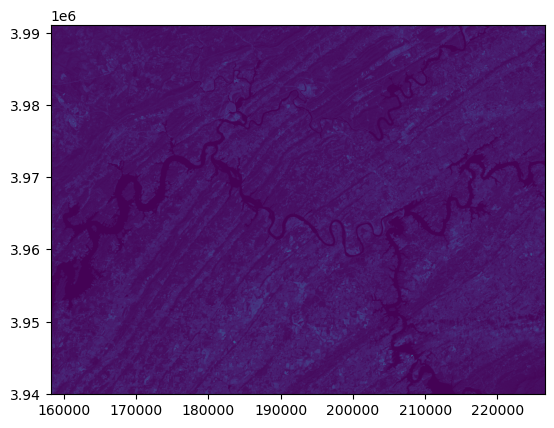

<Axes: >

In [90]:
rasterio.plot.show(landsat)

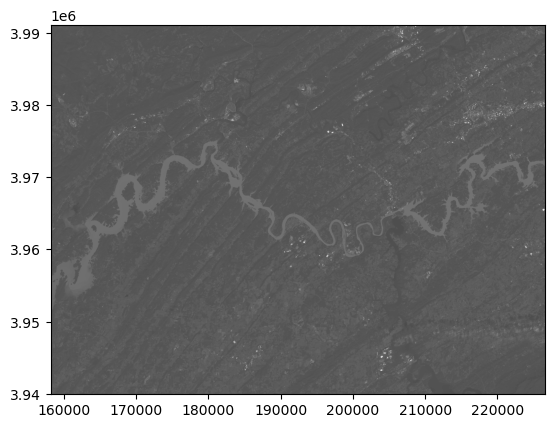

<Axes: >

In [91]:
rasterio.plot.show((landsat,5),cmap="Greys_r")

## Get metadata informaiton

In [92]:
landsat.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 2278,
 'height': 1705,
 'count': 7,
 'crs': CRS.from_epsg(32617),
 'transform': Affine(30.0, 0.0, 158175.0,
        0.0, -30.0, 3991095.0)}

## Visualizing Multiple Bands

| Name                       | Wavelength (µm) | Description                                 |
|----------------------------|-----------------|---------------------------------------------|
| Band1: Coastal           | 0.44 - 0.45            | Coastal and aerosol studies                |
| Band 2: Blue                       | 0.45 - 0.51          | Water body analysis                        |
| Band 3: Green                      | 0.53 - 0.59            | Vegetation and soil discrimination         |
| Band 4: Red                        | 0.64 - 0.67            | Vegetation analysis                        |
| Band 5: Near Infrared (NIR)        | 0.86 - 0.88            | Biomass content and water body analysis    |
| Band 6: Shortwave Infrared (SWIR) 1| 1.6 - 1.7             | Soil moisture, vegetation, and snow differentiation |
| Band 7: Shortwave Infrared (SWIR) 2| 2.2 - 2.3             | Penetrates clouds, smoke, and haze         |



### Calculate the band statistics

In [72]:
# Read all bands
array = landsat.read()

# Calculate statistics for each band
stats = []
for band in array:
    stats.append({
        'min': band.min(),
        'mean': band.mean(),
        'median': np.median(band),
        'max': band.max()})

# Show stats for each channel
stats

[{'min': np.uint16(7097),
  'mean': np.float64(10459.274422951656),
  'median': np.float64(10061.0),
  'max': np.uint16(65454)},
 {'min': np.uint16(6891),
  'mean': np.float64(13417.983661389448),
  'median': np.float64(13223.0),
  'max': np.uint16(65454)},
 {'min': np.uint16(3636),
  'mean': np.float64(16292.12900882855),
  'median': np.float64(16669.0),
  'max': np.uint16(35984)},
 {'min': np.uint16(619),
  'mean': np.float64(8948.413984330547),
  'median': np.float64(8513.0),
  'max': np.uint16(34357)},
 {'min': np.uint16(0),
  'mean': np.float64(9181.95260106231),
  'median': np.float64(8884.0),
  'max': np.uint16(32652)},
 {'min': np.uint16(0),
  'mean': np.float64(8365.891954150242),
  'median': np.float64(8172.0),
  'max': np.uint16(30002)},
 {'min': np.uint16(0),
  'mean': np.float64(8230.058797782693),
  'median': np.float64(8106.0),
  'max': np.uint16(27862)}]

### Define the band names

In [73]:
band_names = ["Coastal", "Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"]
color_maps = ["Blues", "Blues",  "Greens",  "Reds",  "Greens", "Purples", "Purples"]

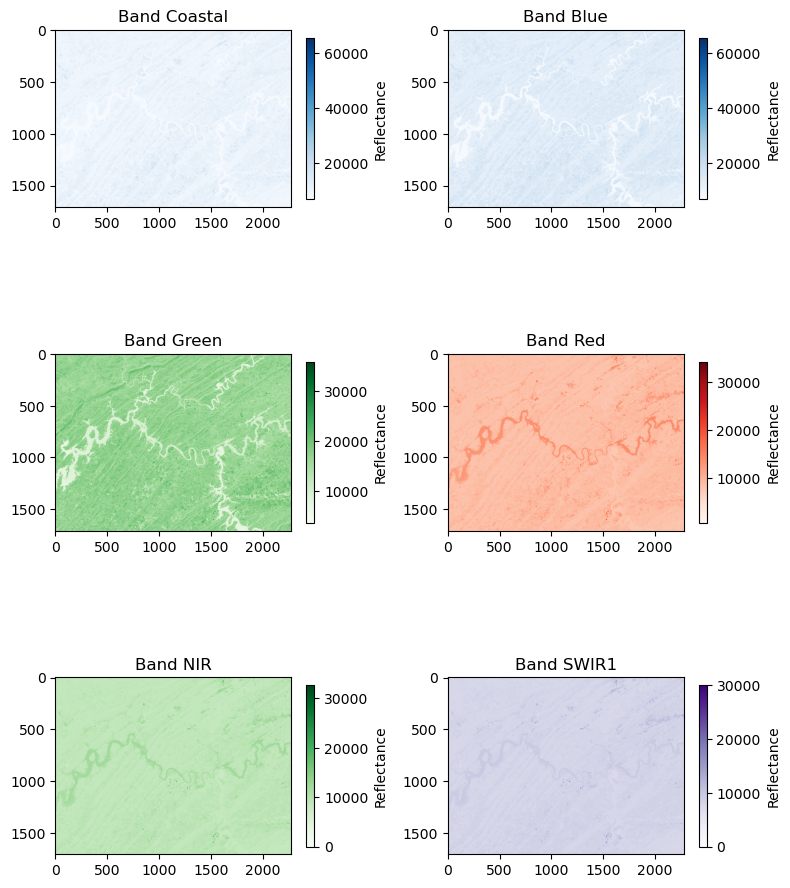

In [74]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

for band in range(1, landsat.count):
    data = landsat.read(band)
    ax = axes[band - 1]
    im = ax.imshow(data,cmap=color_maps[band-1],)
    ax.set_title(f"Band {band_names[band - 1]}")
    fig.colorbar(im, ax=ax, label="Reflectance", shrink=0.5)

plt.tight_layout()
plt.show()

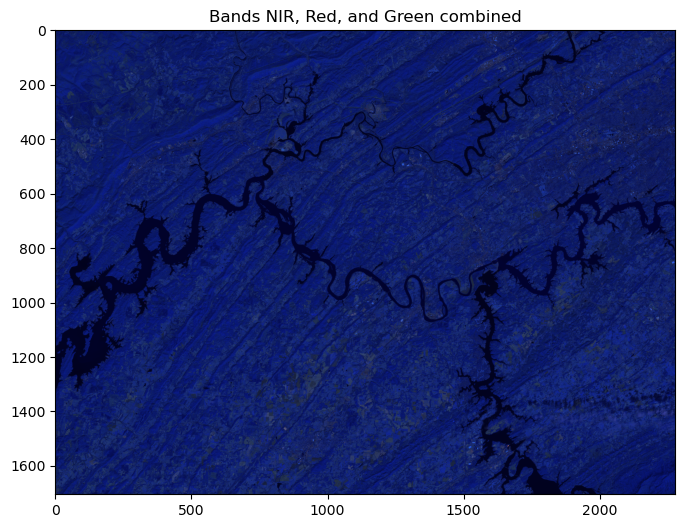

In [93]:
blue_band = landsat.read(3)
red_band = landsat.read(1)
green_band = landsat.read(2)

def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

n_blue = normalize(blue_band)
n_red = normalize(red_band)
n_green = normalize(green_band)

# Stack the bands into a single array
rgb = np.dstack((n_red, n_green, n_blue))

# Plot the stacked array
plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.title("Bands NIR, Red, and Green combined")
plt.show()

In [66]:
## Band Math (NDVI Calculation)

In [78]:
nir_band = landsat.read(5)
red_band = landsat.read(4)

ndvi = (nir_band - red_band) / (nir_band + red_band)
ndvi

array([[2.35637070e-02, 2.02747685e-02, 1.78287947e-02, ...,
        1.06226336e-02, 1.89619236e-02, 2.64866536e-02],
       [2.22491664e-02, 1.93611433e-02, 1.91946715e-02, ...,
        6.86294012e-03, 3.18350079e-02, 4.63923152e-02],
       [2.17339948e-02, 2.51226223e-02, 2.11157768e-02, ...,
        1.77782811e-02, 1.76334107e-02, 3.72075182e-02],
       ...,
       [8.19000819e-04, 0.00000000e+00, 8.87589689e-03, ...,
        2.64523795e-02, 2.22888181e-02, 2.88532676e-02],
       [3.38022695e+00, 3.51928656e+00, 7.05496308e-03, ...,
        2.44788080e-02, 2.66550955e-02, 3.05967889e-02],
       [3.51099285e+00, 3.40986181e+00, 3.29607465e+00, ...,
        2.81576830e-02, 3.19026575e-02, 3.18902548e-02]])

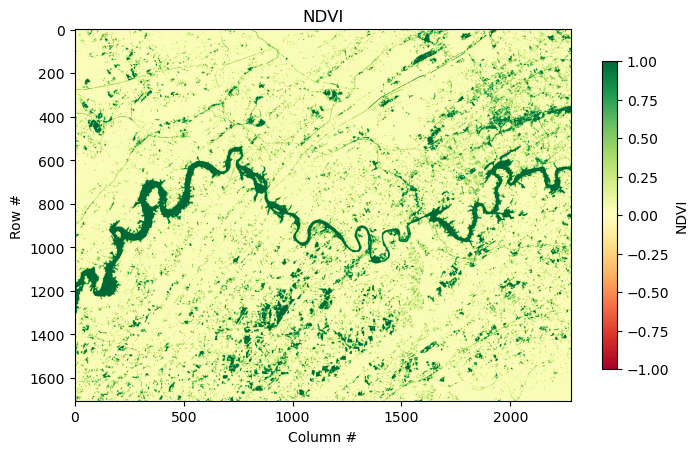

In [84]:
nir_band = landsat.read(5)
red_band = landsat.read(4)

ndvi = (nir_band - red_band) / (nir_band + red_band)
ndvi = ndvi.clip(-1, 1)

plt.figure(figsize=(8, 8))
plt.imshow(ndvi, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar(label="NDVI", shrink=0.5)
plt.title("NDVI")
plt.xlabel("Column #")
plt.ylabel("Row #")
plt.show()

In [83]:
ndvi

array([[2.35637070e-02, 2.02747685e-02, 1.78287947e-02, ...,
        1.06226336e-02, 1.89619236e-02, 2.64866536e-02],
       [2.22491664e-02, 1.93611433e-02, 1.91946715e-02, ...,
        6.86294012e-03, 3.18350079e-02, 4.63923152e-02],
       [2.17339948e-02, 2.51226223e-02, 2.11157768e-02, ...,
        1.77782811e-02, 1.76334107e-02, 3.72075182e-02],
       ...,
       [8.19000819e-04, 0.00000000e+00, 8.87589689e-03, ...,
        2.64523795e-02, 2.22888181e-02, 2.88532676e-02],
       [1.00000000e+00, 1.00000000e+00, 7.05496308e-03, ...,
        2.44788080e-02, 2.66550955e-02, 3.05967889e-02],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.81576830e-02, 3.19026575e-02, 3.18902548e-02]])